In [367]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from IPython.display import Image

In [242]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [16]:
Path = "D:\ML\SVR , polynomial regression assignment\Car_Purchasing_Data.csv"

In [20]:
df_raw = pd.read_csv(r"D:\ML\Svr_and_PolynomialRegression\Car_Purchasing_Data.csv", low_memory= False,encoding='latin-1')

In [135]:
df_trn = df_raw.drop('Car Purchase Amount',axis=1)
depend = df_raw['Car Purchase Amount']

In [139]:
df_trn.head(n=3)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773


## Splitting data
- The training set and validation sets were made out of the raw dataframe with <b>80%</b> data devoted to the<b> training set</b> and <b>20%</b> for the <b>validation set</b>.

In [ ]:
def split(a,n):
    return a[:n],a[n:]
n = 400
x_train, x_valid = split(df_trn,n)
y_train, y_valid = split(depend,n)
    

In [297]:
def print_score(m):
    res = [rmse(m.predict(x_train),y_train),rmse(m.predict(x_valid),y_valid),
              round(m.score(x_train,y_train),7), round(m.score(x_valid,y_valid),7)]
    print("Training RMSE:",res[0],"Validation RMSE",res[1],
          "Training score(R^2):",res[2],"Validation score(R^2):",
          res[3])


In [298]:
def rmse(x,y):
    return round(math.sqrt(((x-y)**2).mean()),6)

In [299]:
x_train.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671


In [300]:
df_raw.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


## Description of the data.

In [301]:
df_raw.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


## CORRELATION BETWEEN VARIABLES.

In [349]:
df_raw.corr()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
Gender,1.000000,-0.064481,-0.036499,0.024193,-0.008395,-0.066408
Age,-0.064481,1.000000,0.000130,0.034721,0.020356,0.632865
Annual Salary,-0.036499,0.000130,1.000000,0.049599,0.014767,0.617862
Credit Card Debt,0.024193,0.034721,0.049599,1.000000,-0.049378,0.028882
Net Worth,-0.008395,0.020356,0.014767,-0.049378,1.000000,0.488580
Car Purchase Amount,-0.066408,0.632865,0.617862,0.028882,0.488580,1.000000


### The given correlation table highlights the fact that credit card debt and gender do not have a very good correlation with the dependent variable. 


In [308]:
y = "Car Purchase Amount"

In [360]:
df_raw.columns


Index(['Customer Name', 'Customer e-mail', 'Country', 'Gender', 'Age',
       'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')

## DATA
- <b> Dependent Variable </b> -'Car Purchase Amount'
- <b> Independent Variables used for training </b> -'Gender', 'Age','Annual Salary', 'Credit Card Debt', 'Net Worth'.
- <b> Variables not used for training </b> -'Name','E-mail Address','Country'

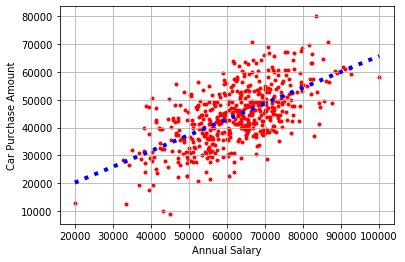

In [401]:
plt.xlabel("Annual Salary")
plt.ylabel("Car Purchase Amount")
plt.grid()
plt.scatter(df_raw['Annual Salary'],df_raw['Car Purchase Amount'],c='r',marker='.')
m1 , b1 = np.polyfit(df_raw["Annual Salary"],df_raw[y],1)
y1 = []
x1=[]
for i in range(20000,100000):
    y1.append(m1*i+b1)
    x1.append(i)
    
plt.plot(x1,y1, linestyle = "dotted",color = 'blue',lw = 4.00)
plt.savefig('D:\ML\Svr_and_PolynomialRegression\salaryGraph.png',dpi=300)

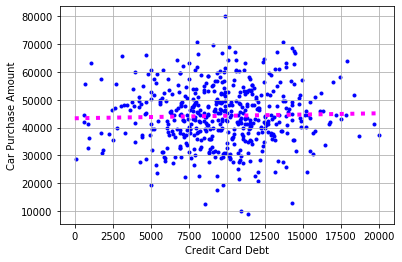

In [403]:
plt.xlabel("Credit Card Debt")
plt.ylabel(y)
plt.grid()
plt.scatter(df_raw["Credit Card Debt"], df_raw[y],c='b',marker='.')
m2 , b2 = np.polyfit(df_raw["Credit Card Debt"],df_raw[y],1)
y2 = []
x2 =[]
for i in range(20000):
    y2.append(m2*i+b2)
    x2.append(i)
plt.plot(x2,y2, linestyle = "dotted",color = 'magenta',lw = 4.00)
plt.savefig("D:\ML\Svr_and_PolynomialRegression\CreditCardGraph.png",dpi=300)

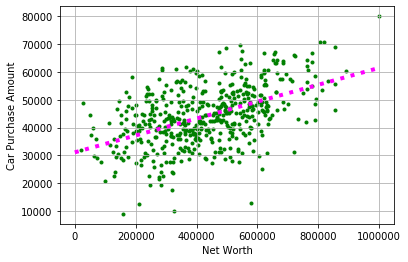

In [407]:
plt.xlabel("Net Worth")
plt.ylabel(y)
plt.grid()
plt.scatter(df_raw["Net Worth"],df_raw[y],c='g',marker='.')
m3 , b3 = np.polyfit(df_raw["Net Worth"],df_raw[y],1)
y3 = []
x3=[]
for i in range(1000000):
    y3.append(m3*i+b3)
    x3.append(i)
plt.plot(x3,y3, linestyle = "dotted",color = 'magenta',lw = 4.00)
plt.savefig("D:/ML/Svr_and_PolynomialRegression/networthGraph.png",dpi=300)

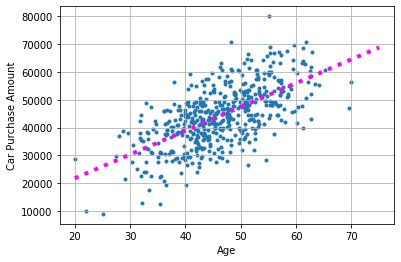

In [408]:
plt.xlabel("Age")
plt.ylabel(y)
plt.grid()
plt.scatter(df_raw["Age"],df_raw[y],marker = '.')
m , b = np.polyfit(df_raw["Age"],df_raw[y],1)
yval = []
xval=[]
for i in range(20,76):
    yval.append(m*i+b)
    xval.append(i)
plt.plot(xval,yval, linestyle = "dotted",color = 'magenta',lw = 4.00)
plt.savefig("D:/ML/Svr_and_PolynomialRegression/AgeGraph.png",dpi=300)

In [313]:
df_raw.columns

Index(['Customer Name', 'Customer e-mail', 'Country', 'Gender', 'Age',
       'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')

## <u> Names </u>
- The below code shows that all the customer names are unique and there is no insight to be drawn from the name of the customer name as each customer name is going to be unique according to this data set and no particular name can be linked to having car purchase amount in a certain range of values.

In [363]:
print("Number of unique customer names:",len(df_raw['Customer Name'].unique()))
print(2/5,"% of people own more than one car.\nThis shows that encoding with respect to names of people would not produce meaningful results.")

Number of unique customer names: 498
0.4 % of people own more than one car.
This shows that encoding with respect to names of people would not produce meaningful results.


## <u>Countries</u> 
- It can be noted from the below bar plot that the frequency distribution of countries is not very high and thus it can be assumed that the customer will almost always have a new country.
- No particular insight could be drawn from the country name as <b> no external metadata relating countries to car industry </b> was provided.

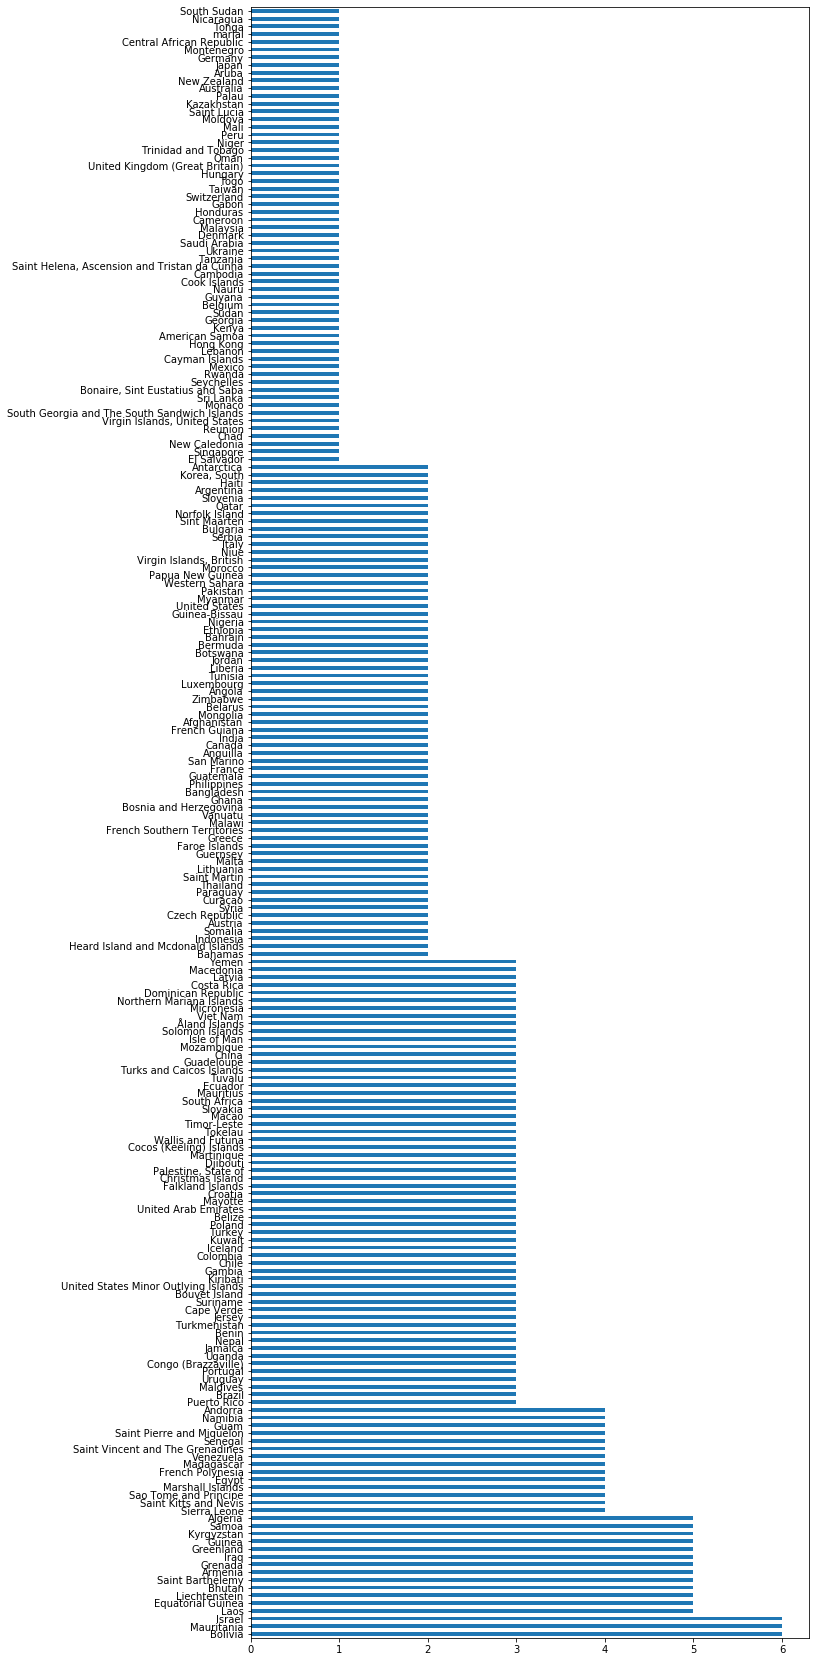

In [318]:
df_raw.Country.value_counts().plot.barh(figsize = (10,30))

   ## <u> Emails</u>
-  From the analysis of emails, it can be seen that <b> all the buyers have a unique email </b> and the email address handles are also almost unique, with the max number of common email handles equal to 3.
- The small size of the given data set does not give much room to include the small frequency of the email handles and thus no concrete insight can be derived from it.
-  This means that <b>a certain email handle does not affect the car purchase amount</b>.

In [319]:
emails = df_raw['Customer e-mail']
print("Unique email ID's :",len(df_raw['Customer e-mail'].unique()))

Unique email ID's : 500


In [320]:
handles ={}
for k in emails:
    handle = k.split('@')[1]
    handles[handle] = handles.get(handle,0)+1

In [321]:
count=0
print("Some email values-")
for i in handles:
    print(i,":",handles[i])
    count+=1
    if(count>10):
        break
print("\nMax Frequency of email values:",max(handles.values()))

Some email values-
quisaccumsanconvallis.edu : 1
diam.co.uk : 2
ametconsectetueradipiscing.co.uk : 1
dignissim.com : 1
egetmollislectus.net : 1
Aliquamerat.edu : 1
at.co.uk : 1
Suspendissetristiqueneque.co.uk : 1
sedsemegestas.org : 1
nuncest.com : 1
dui.org : 1

Max Frequency of email values: 3


## So, in the following two cells, the corresponding columns of Name,Email,Country are dropped from the training and validation data sets .

In [322]:
x_train = x_train.drop(['Customer Name','Customer e-mail','Country'],axis=1)


In [323]:
x_valid = x_valid.drop(['Customer Name','Customer e-mail','Country'],axis=1)


In [324]:
(x_train)

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
395,1,35.337876,61723.00613,9913.194941,291897.4057
396,0,54.772320,72310.39623,3093.707686,724025.4097
397,0,36.572713,67548.77415,10462.355810,388284.2974
398,0,47.714012,62175.68945,12967.284000,343290.6770


# <u>GENERATING MODEL</u>

-  In our above analysis it was noted that since names and emails of the customers were unique, they didn't have any kind of relationship on the car purchase amount.
- Looking at the country names, although the frequency of countries were greater than one, given the small size of data set, it was not feasible to include one hot encoding for the country names.
## Finally, making model without country,customer name and customer email.

In [396]:
deg_list = [i for i in range(1,10)]

## Using POLYNOMIAL REGRESSION 
- Polynomial regression on multivariate data was used to evaluate the dependent variable corresponding to the 5 independent variables of <b> Age, Gender, Net Worth, Credit Card Debt and Annual Salary</b>
- The Pipelining feature of the sklearn module was used which transformed the data according to the degree of the model that was provided. 
- For example -> 

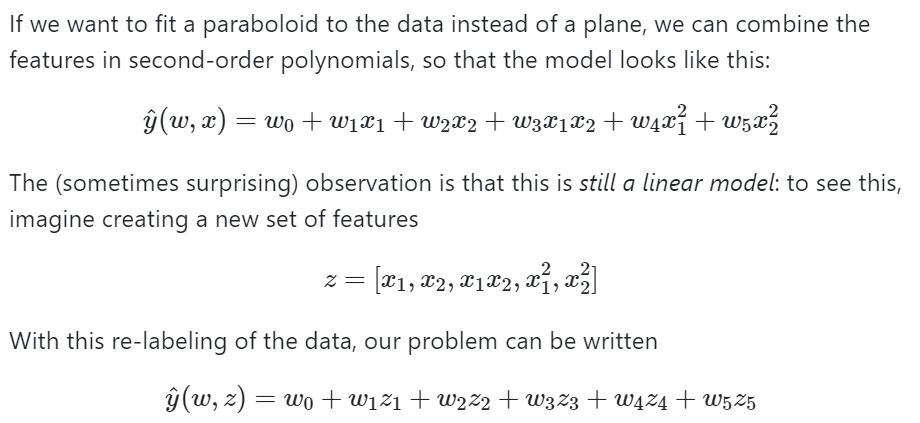

In [366]:
Image("D:/ML/Svr_and_PolynomialRegression/pipeline.JPG")

## Now, the model was iterated over all the degrees ranging from 1 to 10

In [397]:

train_score=[]
train_rmse=[]
test_score=[]
test_rmse=[]
for i in deg_list:
    model = Pipeline([('poly', PolynomialFeatures(degree=i)), ('linear', LinearRegression(fit_intercept=False))])
    model.fit(x_train,y_train)
    print("Multivaraite regression of degree",i)
    %time print_score(model)
    print(model.predict(x_valid)-y_valid)
    train_score.append(model.score(x_train,y_train))
    train_rmse.append(rmse(model.predict(x_train),y_train))
    test_score.append(model.score(x_valid,y_valid))
    test_rmse.append(rmse(model.predict(x_valid),y_valid))

Multivaraite regression of degree 1
Training RMSE: 1.523078 Validation RMSE 1.266214 Training score(R^2): 1.0 Validation score(R^2): 1.0
Wall time: 11.1 ms
400   -1.935412
401   -0.724449
402    1.522693
403    1.294360
404    0.758821
         ...   
495   -0.315051
496   -1.643048
497   -0.705571
498   -0.060130
499    1.159102
Name: Car Purchase Amount, Length: 100, dtype: float64
Multivaraite regression of degree 2
Training RMSE: 1.501508 Validation RMSE 1.300287 Training score(R^2): 1.0 Validation score(R^2): 1.0
Wall time: 10.5 ms
400   -1.984581
401   -0.716887
402    1.643817
403    1.489972
404    1.229251
         ...   
495   -0.207576
496   -1.830337
497   -0.632704
498    0.188344
499    1.284303
Name: Car Purchase Amount, Length: 100, dtype: float64
Multivaraite regression of degree 3
Training RMSE: 1764.709862 Validation RMSE 1943.75212 Training score(R^2): 0.9722905 Validation score(R^2): 0.9707392
Wall time: 23.8 ms
400    1854.457164
401     221.127384
402     560.919

## <u> PLOTS</u>
- ### From the below plots for the validation and the training data sets it is clear that the degree 1 and degree 2 models have the best scores and the least values for RMSE.


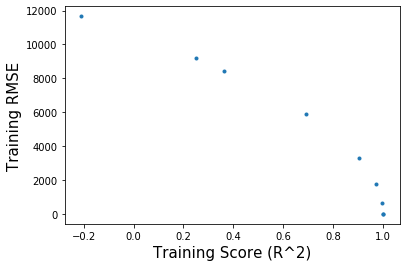

In [409]:
plt.xlabel("Training Score (R^2)",fontsize=15)
plt.ylabel("Training RMSE",fontsize=15)
plt.scatter(train_score,train_rmse,marker='.')
plt.savefig("D:/ML/Svr_and_PolynomialRegression/TrainingScores.png",dpi=300)

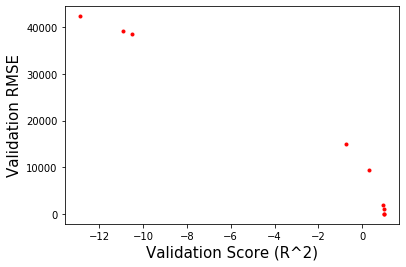

In [410]:
plt.xlabel("Validation Score (R^2)",fontsize=15)
plt.ylabel("Validation RMSE",fontsize=15)
plt.scatter(test_score,test_rmse,color='r',marker='.')
plt.savefig("D:/ML/Svr_and_PolynomialRegression/Validation.png",dpi=300)